In [117]:
# From: https://en.wikipedia.org/w/index.php?title=List_of_world_records_in_Olympic_weightlifting&oldid=976512613
# World Standard interpolated points removed (an artifact of 2018 class redefinition.)
# Records maintained by IWF.

In [118]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from scipy import stats

In [119]:
records = pd.read_csv("Part3.csv")
records = records[records["Weight"] < 110] # Don't include 109+ / 87+ classes as they have no upper limit to the class
records["Record"] = records["Record"].apply(lambda x: float(x[:-3]))
records["Log10Weight"] = np.log10(records["Weight"])
records["Log10Record"] = np.log10(records["Record"])

total = records[records["Event"] == "Total"]
snatch = records[records["Event"] == "Snatch"]
clean_jerk = records[records["Event"] == "Clean & Jerk"]
# records

Slope: 0.855051
Intercept: 0.910408
R: 0.851319 (R^2: 0.724745), P_val: 2.227704E-04
Slope: 0.951090
Intercept: 0.387442
R: 0.881371 (R^2: 0.776815), P_val: 3.356015E-04
Slope: 0.829163
Intercept: 0.704104
R: 0.861023 (R^2: 0.741361), P_val: 1.567222E-04


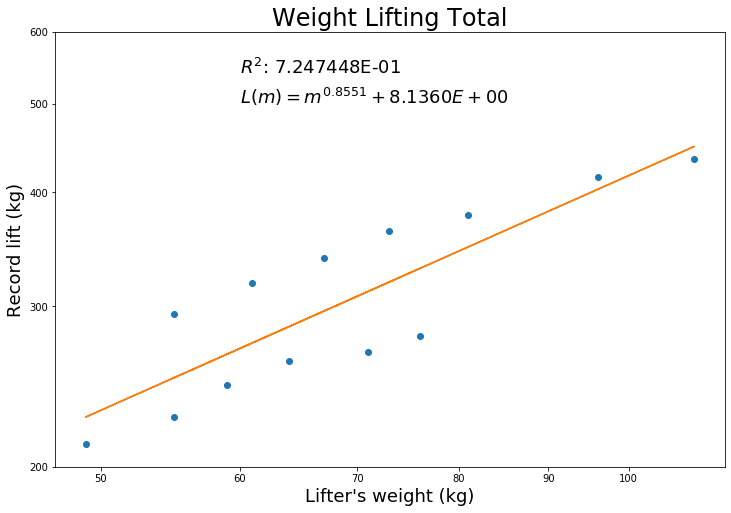

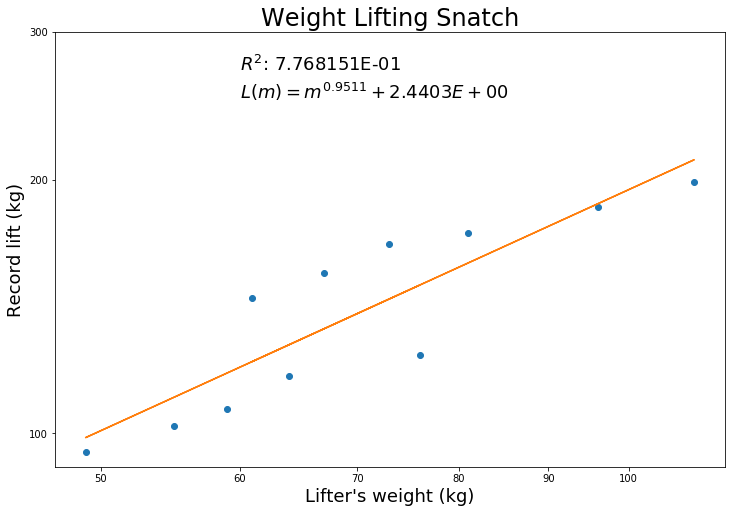

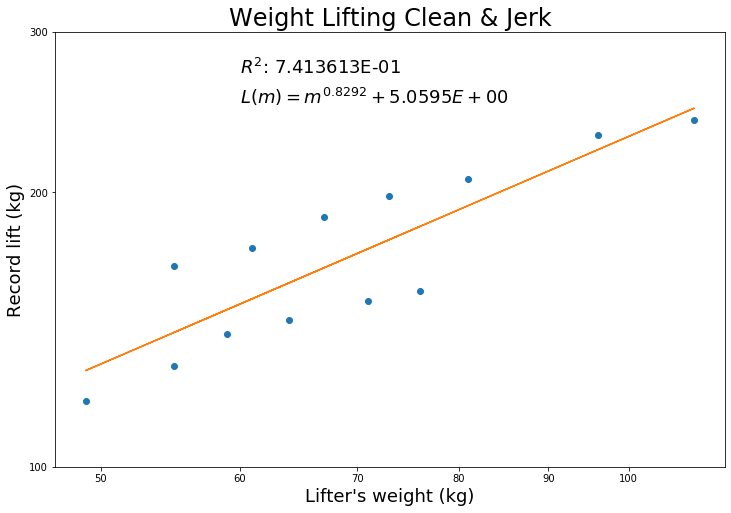

In [121]:
for df in [total, snatch, clean_jerk]:
    event_type = df["Event"].iloc[0]
    slope, intercept, r_value, p_value, std_err = stats.linregress(df["Log10Weight"], df["Log10Record"])
    predict = lambda radius: intercept + slope * radius

    print("Slope: %.6f"%slope)
    print("Intercept: %.6f"%intercept)
    print("R: %.6f (R^2: %.6f), P_val: %.6E"%( r_value, r_value**2, p_value))


    fig, ax = plt.subplots(1, figsize=(12,8))
    ax.scatter(df["Weight"], df["Record"], c="C0")
    ax.plot(np.power(10, df["Log10Weight"]), np.power(10, predict(df["Log10Weight"])), c="C1")
    ax.set_yscale("log")
    ax.set_xscale("log")

    ax.set_title("Weight Lifting %s"%(event_type), fontsize=24)
    ax.set_xlabel(r"Lifter's weight (kg)", fontsize=18)
    ax.set_ylabel(r"Record lift (kg)", fontsize=18)

    xticks = [50, 60, 70, 80, 90, 100]
    yticks = [100, 200, 300, 400, 500, 600]

    if event_type == "Total":
        yticks = yticks[1:]
    else:
        yticks = yticks[:-3]
        
    r_min = np.min(df["Record"])
    r_max = np.max(df["Record"])
    
    
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(d) for d in xticks])
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(d) for d in yticks])
    ax.text(60, (yticks[-1]-yticks[0]) * 0.85 + yticks[0], r"$R^2$: %.6E"%(r_value**2), fontsize=18)
    ax.text(60, (yticks[-1]-yticks[0]) * 0.75 + yticks[0], r"$L(m) = m^{%.4f} + %.4E$"%(slope, np.power(10, intercept)), fontsize=18)
    plt.savefig("part3%s.pdf"%event_type, bbox_inches='tight', pad_inches=0)
